stuff to change and fixnltk use natural language processing to make big eggs to eggs

look up frequency histogram of ingredients


fusion recipe  evaluator?

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cross_validation import cross_val_score
import pandas as pd
from collections import Counter
%matplotlib inline

In [3]:
# upload
loc="C:\\dex\\datascience\\kaggle\\cooking\\"
train=pd.read_json(loc+"train.json")

In [4]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [7]:
# seperate dependent variable into array
y_tr=train.values[:,0]
y_tr=[x.encode('UTF8') for x in y_tr]


['greek', 'southern_us', 'filipino', 'indian', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'italian', 'italian', 'chinese', 'italian', 'mexican', 'italian', 'indian', 'british', 'italian', 'thai', 'vietnamese']


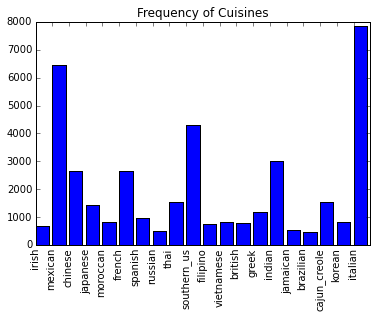

In [84]:
# I used the counter function in order to find the counts of unique cuisines and placed it into a dictionary
y_freq1=dict(Counter(y for y in y_tr))
# print y_freq1
plt.bar(range(len(y_freq1)), y_freq1.values())
plt.xticks(range(len(y_freq1)), y_freq1.keys(), rotation="vertical")
plt.title("Frequency of Cuisines")
plt.show()


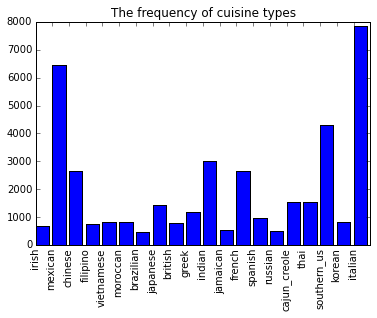

In [8]:
# create bar graph
# create dict for frequency of each type of cuisine(dependent variables)
y_freq={}
for y in y_tr:
    if y_freq.has_key(y):
        y_freq[y]=y_freq[y]+1
    else:
        y_freq[y]=1

plt.bar(range(len(y_freq)), y_freq.values())
plt.xticks(range(len(y_freq)), y_freq.keys(), rotation='vertical')
plt.title("The frequency of cuisine types")
plt.show()

In [66]:
# place indep vars or features into array
x_tr=train.values[:,2]

In [73]:
# how does the ingredients list look by itself unmunged?
print x_tr[0:20]

[ [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
 [u'plain flour', u'ground pepper', u'salt', u'tomatoes', u'ground black pepper', u'thyme', u'eggs', u'green tomatoes', u'yellow corn meal', u'milk', u'vegetable oil']
 [u'eggs', u'pepper', u'salt', u'mayonaise', u'cooking oil', u'green chilies', u'grilled chicken breasts', u'garlic powder', u'yellow onion', u'soy sauce', u'butter', u'chicken livers']
 [u'water', u'vegetable oil', u'wheat', u'salt']
 [u'black pepper', u'shallots', u'cornflour', u'cayenne pepper', u'onions', u'garlic paste', u'milk', u'butter', u'salt', u'lemon juice', u'water', u'chili powder', u'passata', u'oil', u'ground cumin', u'boneless chicken skinless thigh', u'garam masala', u'double cream', u'natural yogurt', u'bay leaf']
 [u'plain flour', u'sugar', u'butter', u'eggs', u'fresh ginger root', u'salt', u'ground cinnamon', u'milk', u'vanilla extract', u'ground 

In [ ]:
# data munging of the ingredients list and then frequency histogram of each of the ingredients

# Find the counts of each unique ingredient
x_tr_plt=dict(Counter(x for sublist in x_tr for x in sublist))


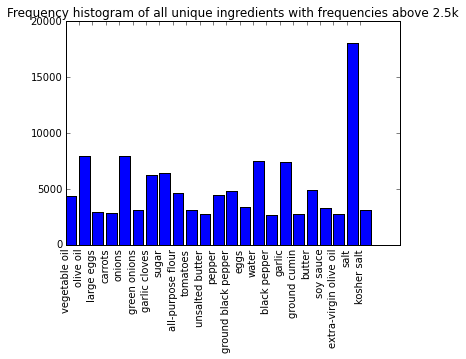

In [130]:
# data munging of the ingredients list and then frequency histogram of each of the ingredients

# Find the counts of each unique ingredient
x_tr_plt=dict(Counter(x for sublist in x_tr for x in sublist))
x_tr_plt1=dict((i, x_tr_plt[i]) for i in x_tr_plt if x_tr_plt[i] >2500)
# print x_tr_plt1

plt.bar(range(len(x_tr_plt1)), x_tr_plt1.values())
plt.xticks(range(len(x_tr_plt1)), x_tr_plt1.keys(), rotation="vertical")
plt.title("Frequency histogram of all unique ingredients with frequencies above 2.5k")
plt.show()


 After reviewing this list of ingredients, you notice that there are redundant ingredients, so more datamunging must occur. For this I will use Natural Language processing

In [85]:
# join all the seperate lists into one list
x_tr1=[', '.join(x) for x in x_tr]
# count vectorizer will take a list of strings and then assign a vector for each word 
# then fron there it will assign a boolean value to it
# print x_tr1

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# below sets the template for the vectorizer using the training dataset
v=vectorizer.fit_transform(x_tr1).toarray()

In [ ]:
# set forest
forest=RandomForestClassifier(15)
# fit the forest
pred=forest.fit(v,y_tr)


In [15]:
# import test dataset
loc="C:\\dex\\datascience\\kaggle\\cooking\\"
test=pd.read_json(loc+"test.json")
# test=test.values

# join test lists

t_tr=[' '.join(t) for t in test.values[:,1]]
t_tr=np.asarray(t_tr)

t_id=test.values[:,0]

print t_id
print len(vectorizer.get_feature_names())
# predict
# pred=forest.predict(t_vect)


[18009L 28583L 41580L ..., 22339L 42525L 1443L]
3010


In [16]:
t_tr=[' '.join(t) for t in test.values[:,1]]

# below uses the fitted vectorized template and then transforms the test dataset into vectors
t_vect=vectorizer.transform(t_tr).toarray()


# predicts using the fitted forest
test_pred=forest.predict(t_vect)
print test_pred

['italian' 'southern_us' 'italian' ..., 'italian' 'southern_us' 'mexican']


In [17]:
forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.cross_validation import cross_val_score

In [23]:
cross_val_score(forest, v, y_tr)

array([ 0.71974666,  0.7144581 ,  0.71528826])

In [3]:
import csv